# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#show all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the dataset

In [2]:
# acquire data
data = pd.read_csv('used_device_data.csv') 

## Data Overview

- Observations
- Sanity checks

In [3]:
#first glimpses of data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
#how many rows and columns?
data.shape

(3454, 15)

In [5]:
#this gives us the statistical summary of thw numerical columns
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [6]:
#here we learn the column names, if there are nulls, and the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
# make a copy of data,creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [8]:
# find total of null values in each column
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Drop the nulls because the amount of data lost is only about 5%.¶

In [9]:
# drop null values, assign to back to df, and verify.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3253 non-null   object 
 1   os                     3253 non-null   object 
 2   screen_size            3253 non-null   float64
 3   4g                     3253 non-null   object 
 4   5g                     3253 non-null   object 
 5   main_camera_mp         3253 non-null   float64
 6   selfie_camera_mp       3253 non-null   float64
 7   int_memory             3253 non-null   float64
 8   ram                    3253 non-null   float64
 9   battery                3253 non-null   float64
 10  weight                 3253 non-null   float64
 11  release_year           3253 non-null   int64  
 12  days_used              3253 non-null   int64  
 13  normalized_used_price  3253 non-null   float64
 14  normalized_new_price   3253 non-null   float64
dtypes: f

In [10]:
#check for duplicate values
df.duplicated().sum()

0

#### Nulls were dropped and no duplicates were found.

In [14]:
#convert screen size to inches
df['screen_size'] = df['screen_size'].div(2.54).round(2)

In [12]:
df['price_diff'] = df.apply(lambda x: x['normalized_new_price'] - x['normalized_used_price'], axis=1)

In [15]:
#verify changes made
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,price_diff
0,Honor,Android,2.25,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0.407528
1,Honor,Android,2.68,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0.356921
2,Honor,Android,2.59,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0.773547
3,Honor,Android,3.95,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0.495574
4,Honor,Android,2.37,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0.557843


In [16]:
list= df.columns[[df[col].dtype == 'O' for col in df.columns]]
list

Index(['brand_name', 'os', '4g', '5g'], dtype='object')

In [17]:
nums = ['screen_size', 
        'main_camera_mp', 
        'selfie_camera_mp', 
        'int_memory', 
        'ram', 
        'battery', 
        'weight', 
        'release_year', 
        'days_used',
        'normalized_used_price',
        'normalized_new_price',
        'price_diff']
cats = ['brand_name', 'os', '4g', '5g']

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           136
Alcatel       121
Asus          118
Micromax      117
Honor         116
HTC           110
Xiaomi        109
Oppo          109
Vivo          103
Nokia          97
Motorola       88
Sony           79
Gionee         56
Acer           51
Panasonic      45
Meizu          44
XOLO           42
Apple          39
Lava           34
Celkon         33
Spice          30
Karbonn        29
Microsoft      21
Coolpad        19
BlackBerry     18
Google         13
OnePlus         5
Realme          5
Name: brand_name, dtype: int64
Others        15.431909
Samsung       10.482631
Huawei         7.715955
LG             6.178912
Lenovo         5.256686
ZTE            4.180756
Alcatel        3.719643
Asus           3.627421
Micromax       3.596680
Honor          3.565939
HTC            3.381494
Xiaomi         3.350753
Oppo           3.350753
Vivo           3.166308
Nokia          2.981863
Moto

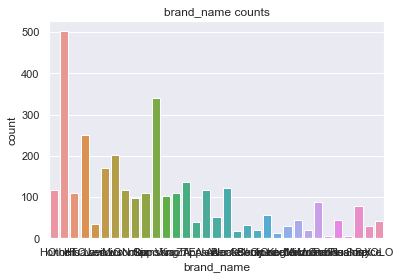

os
Android    3024
Others      128
Windows      65
iOS          36
Name: os, dtype: int64
Android    92.960344
Others      3.934829
Windows     1.998156
iOS         1.106671
Name: os, dtype: float64


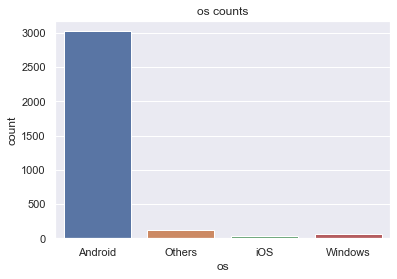

4g
yes    2148
no     1105
Name: 4g, dtype: int64
yes    66.031356
no     33.968644
Name: 4g, dtype: float64


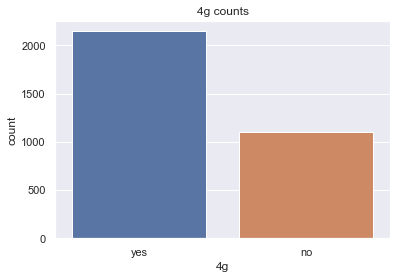

5g
no     3168
yes      85
Name: 5g, dtype: int64
no     97.387027
yes     2.612973
Name: 5g, dtype: float64


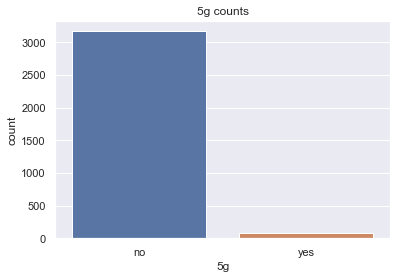

In [18]:
 for col in cats:
        print(col)
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True)*100)
        sns.countplot(x=col, data=df)
        plt.title(col+' counts')
        plt.show()
    

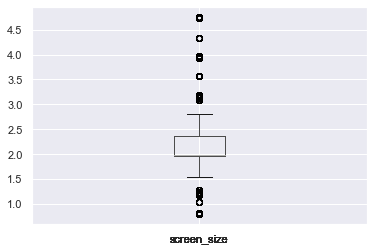

In [19]:
#Plotting Boxplots
for col in nums:
    boxplot = df.boxplot(column=['screen_size'])

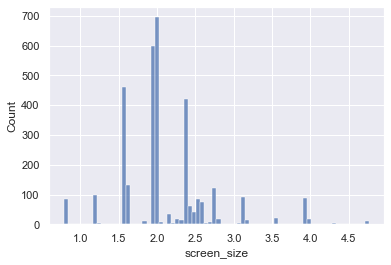

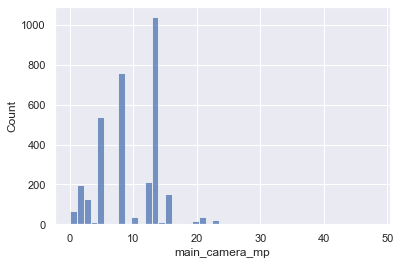

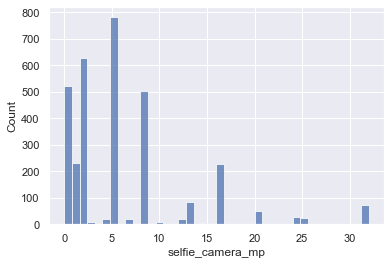

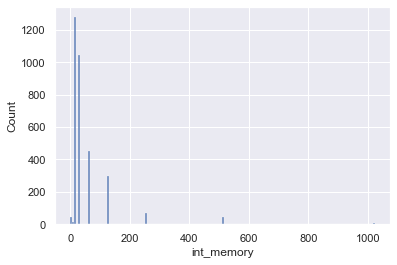

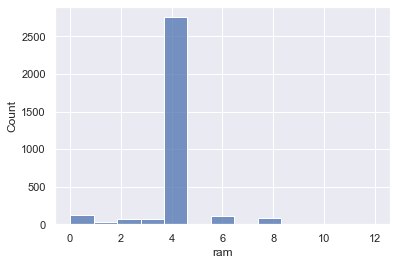

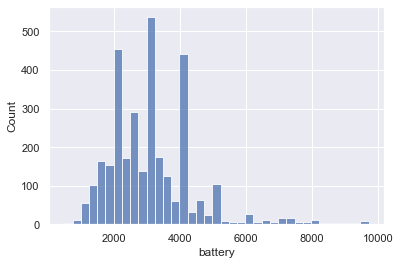

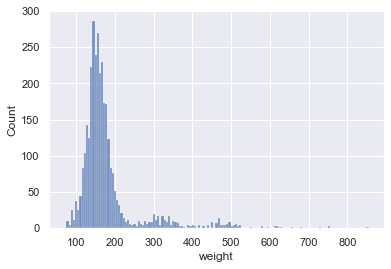

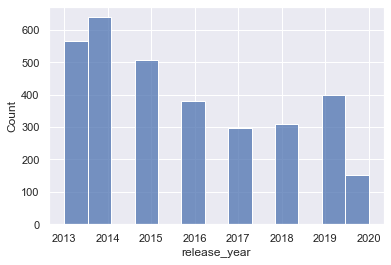

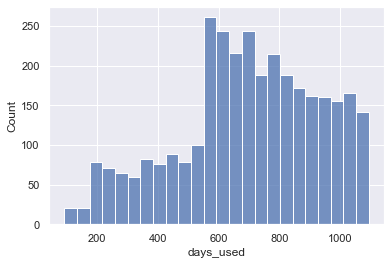

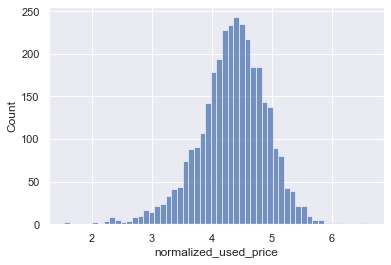

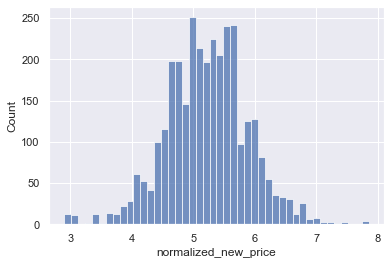

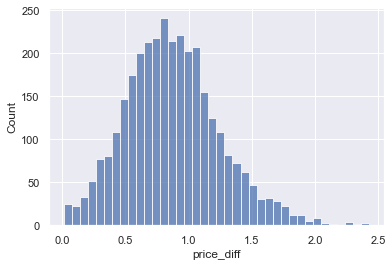

In [20]:
for col in nums:
    sns.histplot(x=col, data=df)
    plt.show()

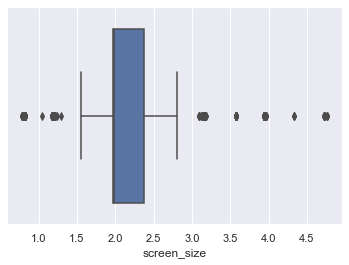

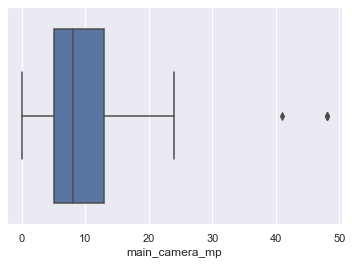

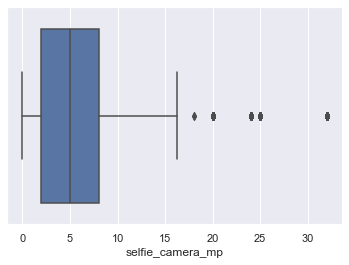

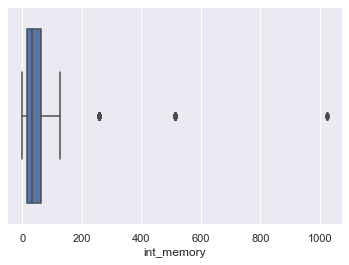

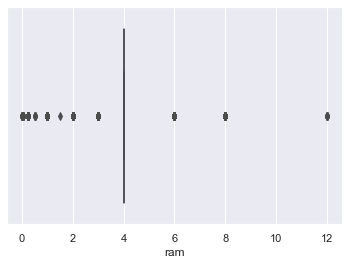

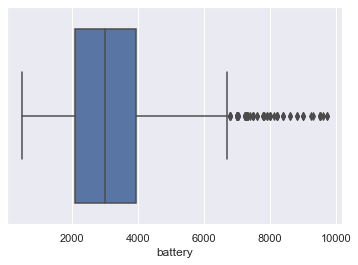

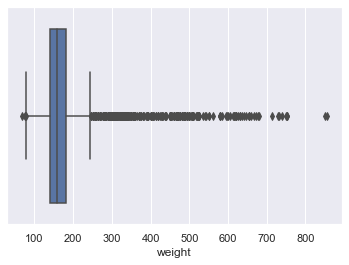

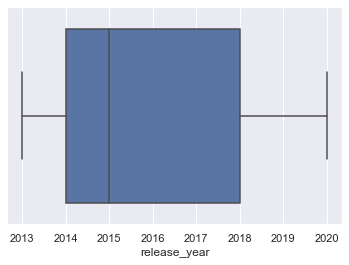

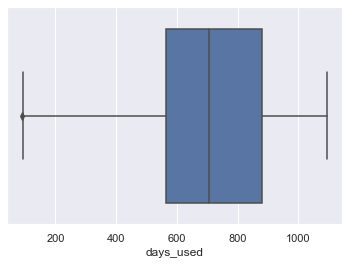

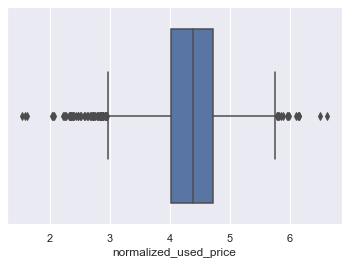

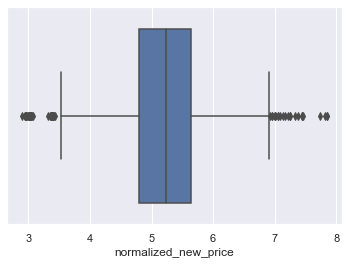

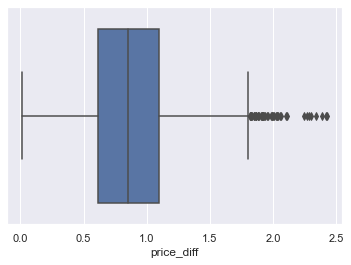

In [22]:
for col in nums:
    sns.boxplot(x=col, data=df)
    plt.show()

In [ ]:
#After univariate exploration 
#Split: Train, Validate, and Test

In [ ]:
Encode and Scale/Normalize/Standardize/Transform/Balance: encode for categorical data; scale, normalize, transform numeric data as needed. Balance refers to correcting class imbalance.
Model: train machine learning algorithms

In [ ]:
def scale_data(train, val, test, cols_to_scale):
    '''
    This function takes in train, validate, and test dataframes as well as a
    list of features to be scaled via the RobustScaler. It then returns the 
    scaled versions of train, validate, and test in new dataframes. 
    '''
    # create copies to not mess with the original dataframes
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()
    
    # create the scaler and fit it
    scaler = RobustScaler()
    scaler.fit(train[cols_to_scale])
    
    # use the scaler to scale the data and resave
    train_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(train[cols_to_scale]),
                                               columns = train[cols_to_scale].columns.values).set_index([train.index.values])
    val_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(val[cols_to_scale]),
                                               columns = val[cols_to_scale].columns.values).set_index([val.index.values])
    test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(test[cols_to_scale]),
                                               columns = test[cols_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, val_scaled, test_scaled

The residplot displays residuals of a linear regression 
(how far each data point was off the linear regression fit by Euclidean distance).

In [ ]:
•	The lmplot displays a linear regression fit with confidence intervals on a scatterplot.

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Model Building - Linear Regression

## Model Performance Check

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations 

- 


___